# IBM AI Enterprise Workflow Capstone Project
## Part 1

### 1. Business scenario and hypotheses

Recently at AAVAIL there has been discussion about different approaches to revenue generation. 

First option: tiered, subscription-based service 

Second experimental option: à la carte approach  
Difficulty: hard to predict monthly revenue

Experimental data: transaction-level purchases across 38 different countries


Task: to create a service that, at any point in time, will predict the revenue for the following month and for a specific country. To simplify the task it is allowed to limit the model to the ten countries with the most revenue.

Business metric: revenue gained thanks to more accurate predictions

H0 (null hypothesis): new models provide a significant accuracy improvement in revenue prediction  
H1: new models does not provide a significant accuracy improvement in revenue prediction

### 2. Ideal data to address the business opportunity and the rationale

The ideal data would be a set of variables which influence the revenue of the company, and the revenue itself. To find out which variables have an influence on the revenue we should talk to employees from marketing and sales departments or other professionals who may know. My assumption is that the ideal data set should include the monthly revenue, the subscription type, the number of subscribers, the country and some other more specific features. 

### 3. Python script to extract relevant data from multiple data sources

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import warnings

plt.style.use('seaborn')
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data_path = os.path.abspath(os.path.join("..", "data/cs-train"))
print('Path: {}'.format(data_path))

Path: /Users/elizaveta_larina/Capstone/data/cs-train


In [3]:
# let's look at some data and see the column names
df_partial = pd.read_json(data_path + '/invoices-2019-07.json')
df_partial.head(3)

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
0,United Kingdom,17841.0,558877,0.83,23167,1,2019,7,1
1,United Kingdom,17841.0,558877,0.42,22893,5,2019,7,1
2,United Kingdom,17841.0,558877,0.42,22420,3,2019,7,1


In [4]:
# creating a single dataframe
from data_ingestion_single_data_frame import fetch_data
df = fetch_data(data_path)
df.head(3)

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,17998.0,28,489562,11,5.95,84656,1,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28


In [5]:
df.shape

(815011, 10)

In [6]:
df.dtypes

country                 object
customer_id            float64
day                      int64
invoice                 object
month                    int64
price                  float64
stream_id               object
times_viewed             int64
year                     int64
invoice_date    datetime64[ns]
dtype: object

In [7]:
# correction of errors in data
df[df.price<0]

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
178920,United Kingdom,NaN,26,506401,4,-53594.36,B,1,2018,2018-04-26
276274,United Kingdom,NaN,16,516228,7,-44031.79,B,1,2018,2018-07-16
405052,United Kingdom,NaN,17,528059,10,-38925.87,B,1,2018,2018-10-17


In [8]:
df = df[df.price>=0]

### 4. Relationship between the relevant data, the target and the business metric

First, we need to find out which 10 countries have the highest revenue. In order to do that we have to summarize all the earnings from purchases made in each country.

In [9]:
summarized = df.groupby(['country'])['price'].sum()
ten_countries = summarized.sort_values(ascending=False).head(10)
ten_countries

country
United Kingdom    3.658066e+06
EIRE              1.070692e+05
Germany           4.927182e+04
France            4.056514e+04
Norway            3.849475e+04
Spain             1.604099e+04
Hong Kong         1.445257e+04
Portugal          1.352867e+04
Singapore         1.317592e+04
Netherlands       1.232280e+04
Name: price, dtype: float64

In [10]:
ten_countries = ['United Kingdom', 'EIRE', 'Germany', 'France', 'Norway', 'Spain', 'Hong Kong', 'Portugal', 'Singapore', 'Netherlands']
df_ten_count = df[df['country'].isin(ten_countries)]
df_ten_count.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,17998.0,28,489562,11,5.95,84656,1,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


In [11]:
df_ten_count.groupby(['country','year']).agg({'price': 'sum'})

price
country        year              
EIRE           2017  4.433090e+03
               2018  7.439830e+04
               2019  2.823782e+04
France         2017  1.200340e+03
               2018  2.453834e+04
               2019  1.482646e+04
Germany        2017  1.525790e+03
               2018  3.055433e+04
               2019  1.719170e+04
Hong Kong      2018  8.715380e+03
               2019  5.737190e+03
Netherlands    2017  3.842600e+02
               2018  8.948110e+03
               2019  2.990430e+03
Norway         2017  1.232800e+02
               2018  3.471640e+04
               2019  3.655070e+03
Portugal       2017  2.943500e+02
               2018  4.292260e+03
               2019  8.942060e+03
Singapore      2018  3.725100e+02
               2019  1.280341e+04
Spain          2017  8.452200e+02
               2018  7.311560e+03
               2019  7.884210e+03
United Kingdom 2017  1.872411e+05
               2018  2.408688e+06
               2019  1.062137e+06

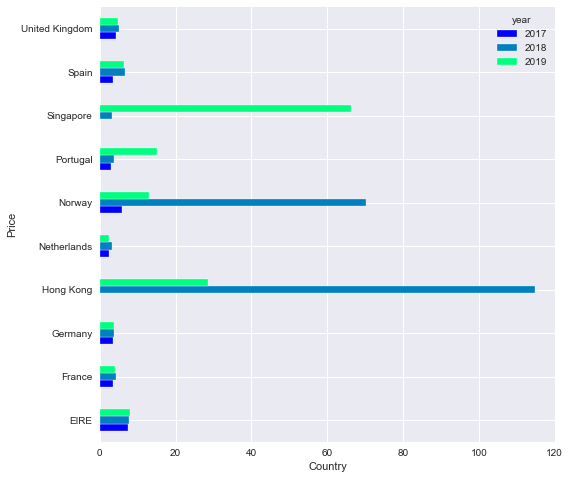

In [12]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(121)
sns.set_style("darkgrid")
table = pd.pivot_table(df_ten_count, index='country', columns='year', values='price')
table.plot(kind = 'barh', ax = ax1, colormap = 'winter')
ax1.set_ylabel('Price');
ax1.set_xlabel('Country');

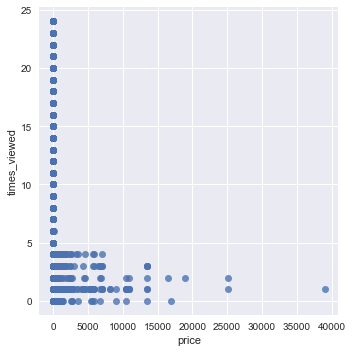

In [13]:
vis1 = sns.lmplot(data = df_ten_count, x = 'price', y = 'times_viewed', fit_reg = False, size = 5)

In [14]:
# creating a new dataset for future predictions of monthly revenue

df_monthly = df_ten_count.groupby(['year', 'month']).agg({'times_viewed':'sum', 'price':'sum', 'country':'first',}).reset_index()
df_monthly.head(3)

,year,month,times_viewed,price,country
0,2017,11,44643,40786.130,United Kingdom
1,2017,12,162013,155261.270,United Kingdom
2,2018,1,171367,179414.574,United Kingdom


In [15]:
df_monthly['date'] = str(df_monthly['year'])+'_'+str(df_monthly['month'])
df_monthly.head(3)

,year,month,times_viewed,price,country,date
0,2017,11,44643,40786.130,United Kingdom,0 2017\n1 2017\n2 2018\n3 2018...
1,2017,12,162013,155261.270,United Kingdom,0 2017\n1 2017\n2 2018\n3 2018...
2,2018,1,171367,179414.574,United Kingdom,0 2017\n1 2017\n2 2018\n3 2018...


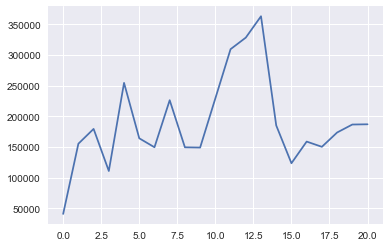

In [16]:
df_UK = df_monthly[df_monthly['country'] == 'United Kingdom']
df_UK.price.plot()

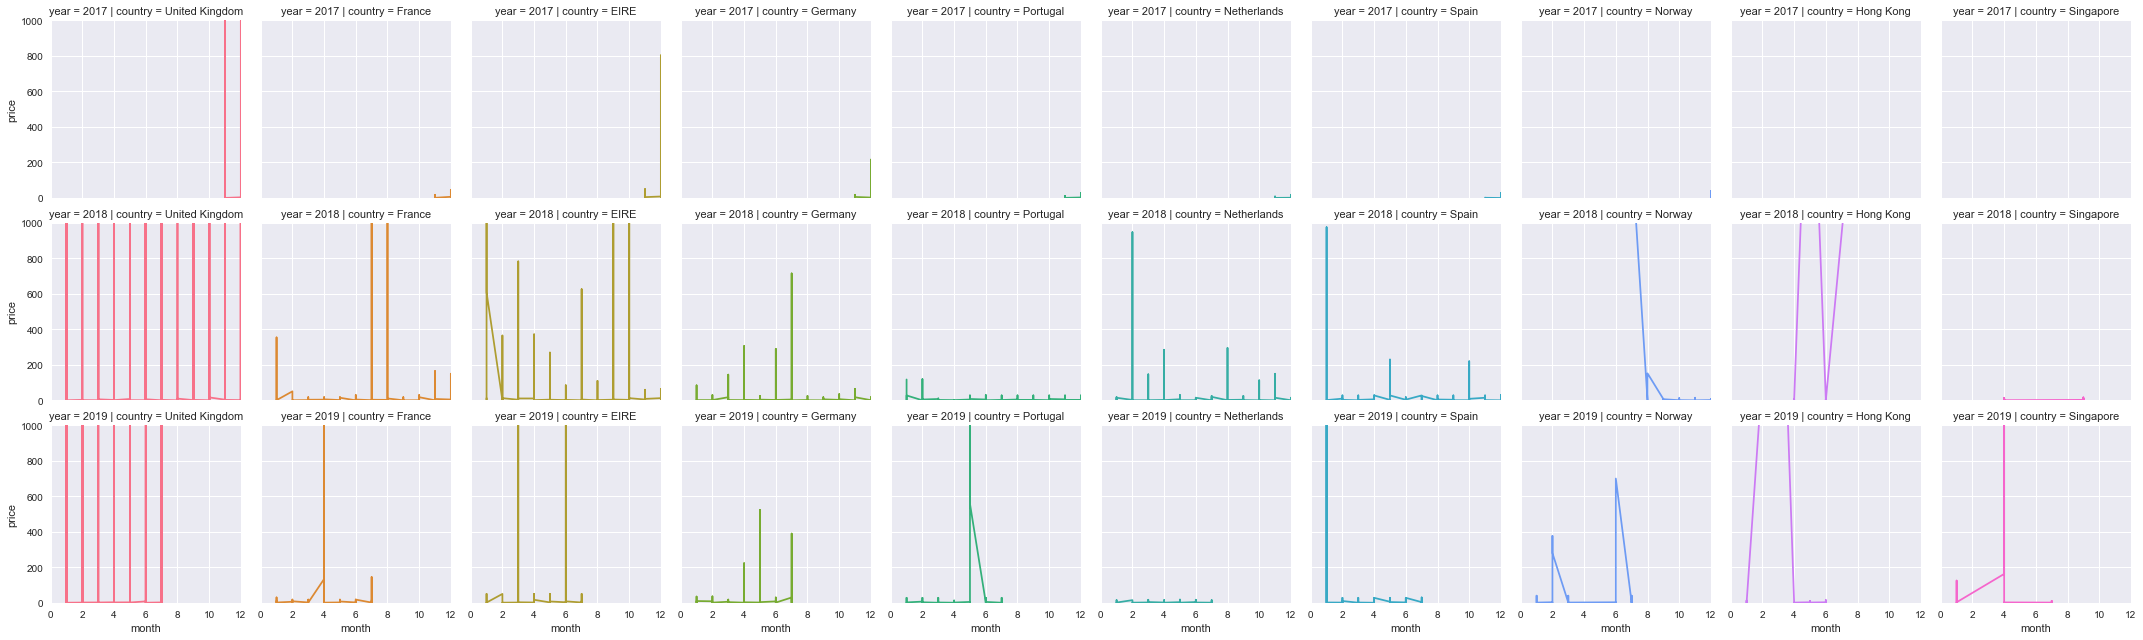

In [21]:
g = sns.FacetGrid(df_ten_count, col = 'country', hue = 'country', row = 'year')
g = g.map(plt.plot, 'month', 'price')
g.set(xlim = (0, 12), ylim = (0, 1000))